# Diabetes and Logistic regression

data downloaded from [Kaggle](https://www.kaggle.com/kandij/diabetes-dataset)

**Table of Content**
- [Dataset overview](#Dataset-overview)
- [Logisitc regression overview](#Logistic-regression-overview)
- [Gathering data and overview](#Gathering-data-and-overview)
- [Data cleaning](#Data-cleaning)
- [Data visualisation](#Data-visualisation)
- [Confidence values and hypothesis testing](#Confidence-values-and-hypothesis-testing)
    - [(a) Glucose](#(a)-Glucose)
    - [(b) Blood Pressure](#(b)-Blood-Pressure)
    - [(c) Skin Thickness](#(c)-Skin-Thickness)
    - [(d) Insulin](#(d)-Insulin)
    - [(e) BMI](#(e)-BMI)
    - [(f) Diabetes Pedigree Function](#(f)-Diabetes-Pedigree-Function)
    - [(h) Age](#(h)-Age)
- [Logistic regression](#Logistic-regression)
    - [(a) Initial Logistic regression model](#(a)-Initial-Logistic-regression-model)
    - [(b) Logistic Regression using cleaned diabetes dataset](#(b)-Logistic-Regression-using-cleaned-diabetes-dataset)
    - [(c) Logistic Regression - Further Iteration](#(c)-Logistic-Regression---Further-Iteration)
    - [(d) Logistic Regression - Hyperparameter optimization](#(d)-Logistic-Regression---Hyperparameter-optimization)


## Dataset overview

A binary logistic regression model will be implemented using Python in Jupyter Notebooks with an example of predicting if a patient has diabetes mellitus using binary logistic regression. Diabetes mellitus is a series of metabolic disorders where there is hyperglycemia (i.e., high blood glucose levels) which can be broadly divided into type 1 diabetes (patients cannot produce insulin, mainly affecting juveniles), type 2 diabetes (patients have insulin resistance) and gestational diabetes (female patients who while pregnant can be less susceptive to insulin). Type 2 diabetes is the most prevalent form of diabetes. 

The dataset used was the Pima Indian Diabetes dataset from Machine Learning Repository (originally from National Institute of Diabetes and Digestive and Kidney Disease) which contains 8 medical diagnostic attributes and one target variable (i.e, Outcome) of 768 female patients with 34.9% having diabetes (268 patients). The variance for insulin for both categories was quite high. An independent t-test was used to compare the values between diabetic and non-diabetic patients showing that differences occurred for all 8 independent variables. For example, there is evidence to suggest that the average blood glucose concentration for diabetics mean=142.2 mg/dl (95% CI: 138.6, 145.7) was higher than non-diabetics, mean=110.7 mg/dl (95% CI: 108.5, 112.9); t(766)= 15.67, p < 0.001 at the 95% confidence level. Before an algorithm like logistic regression can be implemented data quality must be checked.


## Logistic regression overview

Machine learning techniques can be generally divided into either supervised or unsupervised methods. Unsupervised learning techniques mainly involve clustering and regression such as principal component analysis (PCA) for data dimensionality reduction. These unsupervised techniques do not require labeled data so that the model output is predicted or classified based on patterns on the input data. 

In comparison, supervised techniques require required the data to be labelled in addition to being split into training and testing datasets. Supervised learning techniques mainly deal with classification (training a model to predict what animal is in a photo) or regression (predicting the price of a house based on number of rooms, neighborhood, area, etc.). However, in the case of supervised classification algorithms, they cannot predict an animal if it was not present during model training. Data is split so that the model can be evaluated on data it has not seen before (i.e., testing data). After a model has been fitted a confusion matrix can be generated to evaluate the model in addition to other metrics.

A commonly supervised regression technique is linear regression where an independent variable (or explanatory) is used to estimate dependent variable (i.e., hours of study to estimate grades). This analogy can be extended to multiple independent variables are used to estimate a dependent variable in multiple linear regression (MLS) (i.e., hours of study, extracurricular activity, number of days sick used to predict grades). The output of MLS is a continuous value (i.e., price of house or grades), in comparison, logistic regression returns the probability of a binary outcome (for example is an email spam or not).

Logistic regression (or logit regression) is a supervised classification algorithm (despite regression in the name) that is used to estimate the probability that an occurrence belongs to a classification (e.g. spam folder of email) where a threshold probability of >50% the model will predict that the occurrence belongs to the positive class (denoted as 0, i.e. normal email) or else predicts that the classification belongs to the negative class (denoted as 1, i.e. spam). The logistic function (denoted as σ) is a sigmoid function with the output bound between 0 and 1.

Logistic regression finds many applications, such as in healthcare settings to predict the likelihood that a cancer is benign or cancerous from nth variables. A database of patients with several variables is split into two with the training dataset being used to train the model while the test dataset is used for model evaluation. These variables can be measured for a new patient to predict if cancer is benign or cancerous. While this type of logistic regression is known as binary logistic regression, it can also be used to predict membership to more than two categories (i.e., is a person married, single or divorced) then multinomial logistic regression can be used.
In order to use logistic regression, there are several general assumptions of the model;
- The true conditional probabilities are a logistic function of the independent variables.
- Independent variables are measured without error. 
- Observations are independent.
- Errors are binomially distributed.
- Independent variables are not linear combinations of each other.
- No extraneous variables are included, and no important variables are omitted. 

While a lot of data include nominal type data, logistic regression cannot use these variables for modelling (including linear regression too). To overcome this, dummy variable can be computed. One of the dummy variables of a data type can be removed so that perfect multicollinearity can be avoided. Multicollinearity can also affect the estimate of the dependent variables if the correlation coefficient of several independent variables is high (>0.8) and effects the interpretation of independent coefficients of the logistic regression model.

## Gathering data and overview

In [305]:
# importing modules required for notebook
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import norm
import researchpy as rp

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Import libraries

In [306]:
diabetes = pd.read_csv('diabetes.csv')
# import diabetes dataset as a pandas dataframe

In [307]:
diabetes.sample(5)
# Looking at some random samples we can look at an overview of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
530,2,122,60,18,106,29.8,0.717,22,0
400,4,95,64,0,0,32.0,0.161,31,1
678,3,121,52,0,0,36.0,0.127,25,1
720,4,83,86,19,0,29.3,0.317,34,0
524,3,125,58,0,0,31.6,0.151,24,0


In [308]:
diabetes.describe()
# Looking at the five number summary statistics of variables since they are numeric. This can be confirmed using .dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [309]:
diabetes.dtypes
# In correct format

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [310]:
diabetes.isnull().sum()
# No missing values are present. However from the above functions we can see that Glucose, BloodPressure, SkinThickness, 
# Insulin and BMI have min values of 0 which are not real clinical values. 
# Lets look at counts. A value of 0 for Pregnancies is a real value.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [311]:
# reviewing the number of zeros in numerical columns
print("Number of 0's for Glucose:", diabetes['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", diabetes['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", diabetes['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", diabetes['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", diabetes['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [312]:
percent = 100

glucose = diabetes['Glucose'].isin([0]).sum() / diabetes.shape[0]*percent
print("Percentage of missing data for Glocuse: %.2f" % glucose)

bloodpressure = diabetes['BloodPressure'].isin([0]).sum() / diabetes.shape[0]*percent
print("Percentage of missing data for Blood Pressure: %.2f" % bloodpressure)

skinthickness = diabetes['SkinThickness'].isin([0]).sum() / diabetes.shape[0]*percent
print("Percentage of missing data for Skin Thickness: %.2f" % skinthickness)

insulin = diabetes['Insulin'].isin([0]).sum() / diabetes.shape[0]*percent
print("Percentage of missing data for Insulin: %.2f" % insulin)

bmi = diabetes['BMI'].isin([0]).sum() / diabetes.shape[0]*percent
print("Percentage of missing data for BMI: %.2f" % bmi)


# We can see we are missing between 0.65%-48.6% of data for these variables, even though the isnull function showed us no 
# missing data as NaN.

Percentage of missing data for Glocuse: 0.65
Percentage of missing data for Blood Pressure: 4.56
Percentage of missing data for Skin Thickness: 29.56
Percentage of missing data for Insulin: 48.70
Percentage of missing data for BMI: 1.43


## Data cleaning

In [313]:
diabetes_clean = diabetes.copy()
# Make copy of data set before making minor wrangling operations as we don't want to edit our row data

In [314]:
# As missing values of 0 for above columns are not real, the data can be deleted or imputed. 
# As the percentage of missing values is low, imputation using the mean will be used, given data is normally
# distributed (see below). As data is normally distributed, imputation using the median could equally be used 

diabetes_clean['Glucose'] = diabetes_clean['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes_clean['BloodPressure'] = diabetes_clean['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes_clean['SkinThickness'] = diabetes_clean['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())
diabetes_clean['Insulin'] = diabetes_clean['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes_clean['BMI'] = diabetes_clean['BMI'].replace(0,diabetes['BMI'].mean())

# Replacing 0 values in these columns with mean

In [315]:
diabetes_clean['Pregnancies'].values[diabetes_clean['Pregnancies'] > 0] = 1
# Changing number of pregancies to a binary variable. Where any pregnancy > 0 is returned a value of 1. Since no 
# pregnancies is already encoded as 0 this does not need to be changed

In [316]:
diabetes_clean.describe()
# Operations carried out successfully

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [317]:
diabetes_clean.to_csv('diabetes_clean.csv')
# Exporting cleaned data to csv file so that it can be reused

## Data visualisation

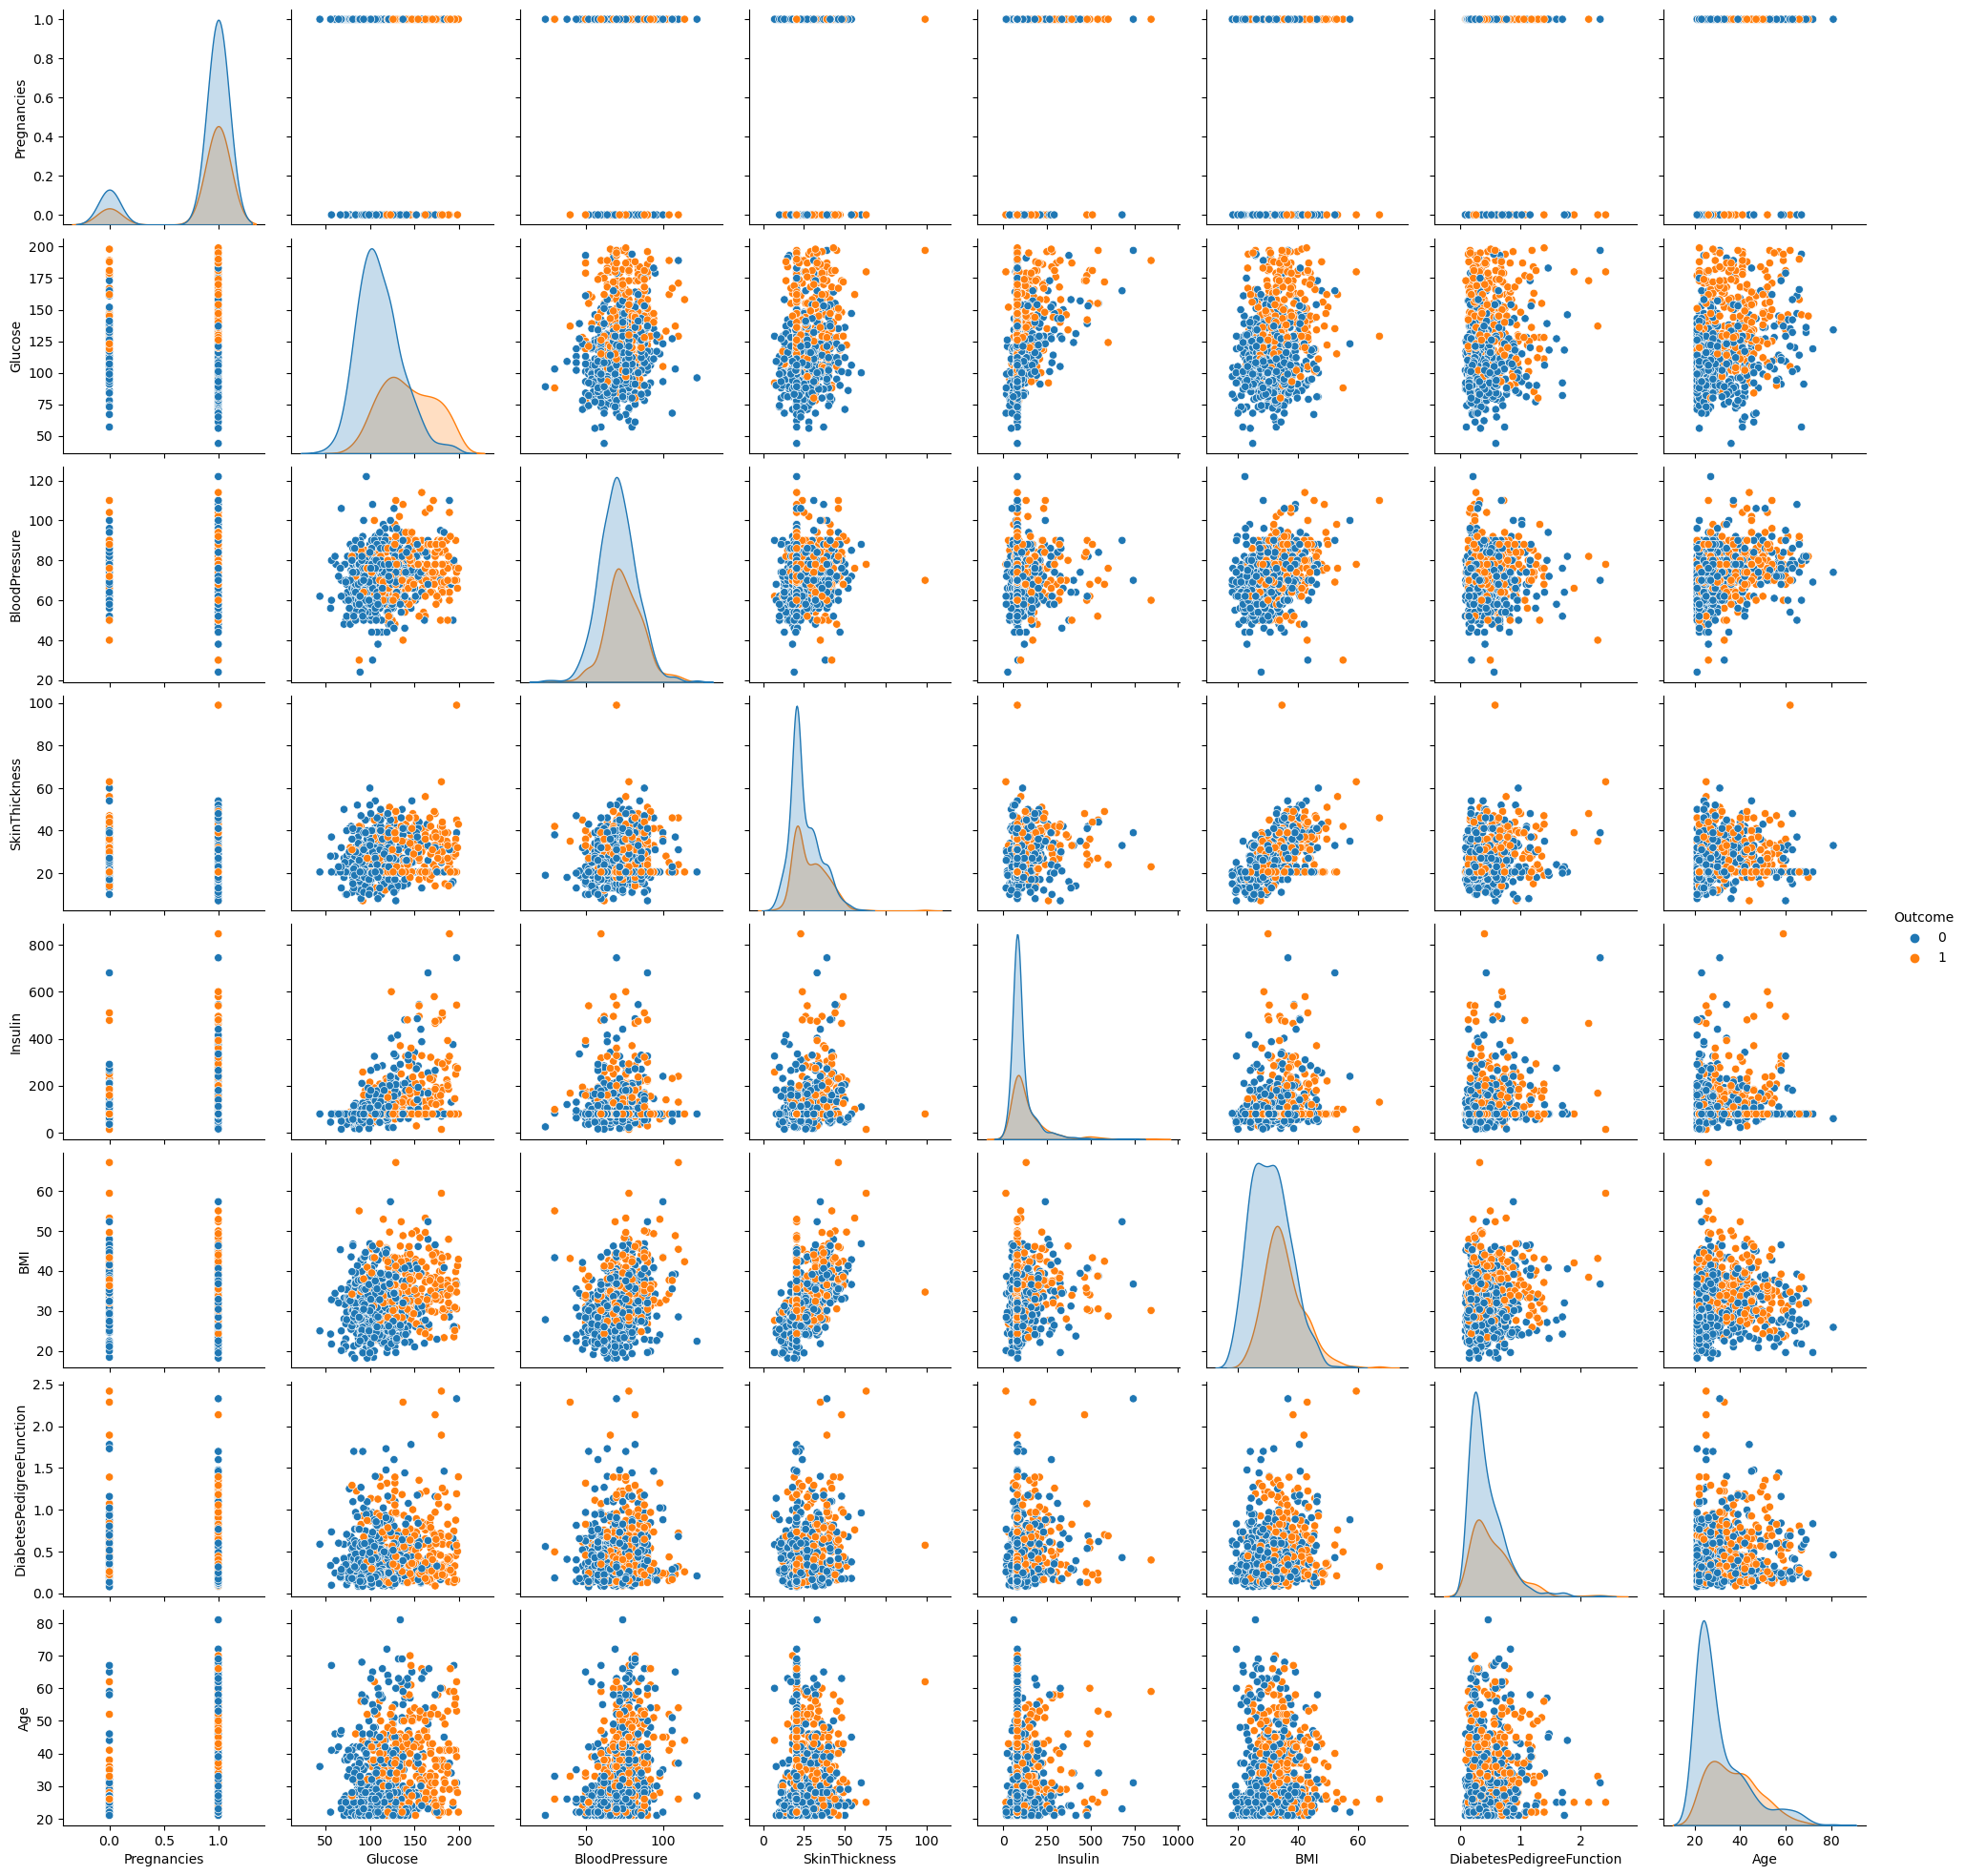

In [318]:
sns.pairplot(diabetes_clean, diag_kind='kde', hue='Outcome'); 
# Looking at a high level overview of the data separated out by outcome, i.e. 1 = diabetes and 0 = no diabetes
# Lets look at number of patients with diabetes and some of these visuals in more detail

In [319]:
diabetes_clean['Outcome'].value_counts()
# There is a class imbalance where more patients do not have diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

In [320]:
diabetes_clean['Pregnancies'].value_counts()

Pregnancies
1    657
0    111
Name: count, dtype: int64

In [321]:
# What percentage of Hispanics have diabetes
percent_diabetes = (268/768)*100
# 34.9 % of patients have diabetes
print(percent_diabetes)

34.89583333333333


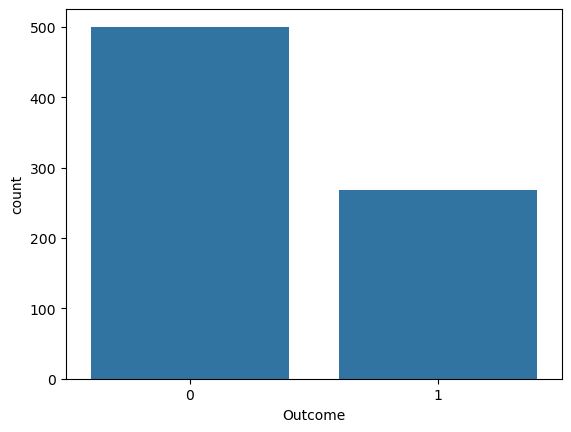

In [322]:
base_color = sns.color_palette()[0]
sns.countplot(data = diabetes_clean, x = 'Outcome', color = base_color);
# Where 1 is where a patient has diabetes

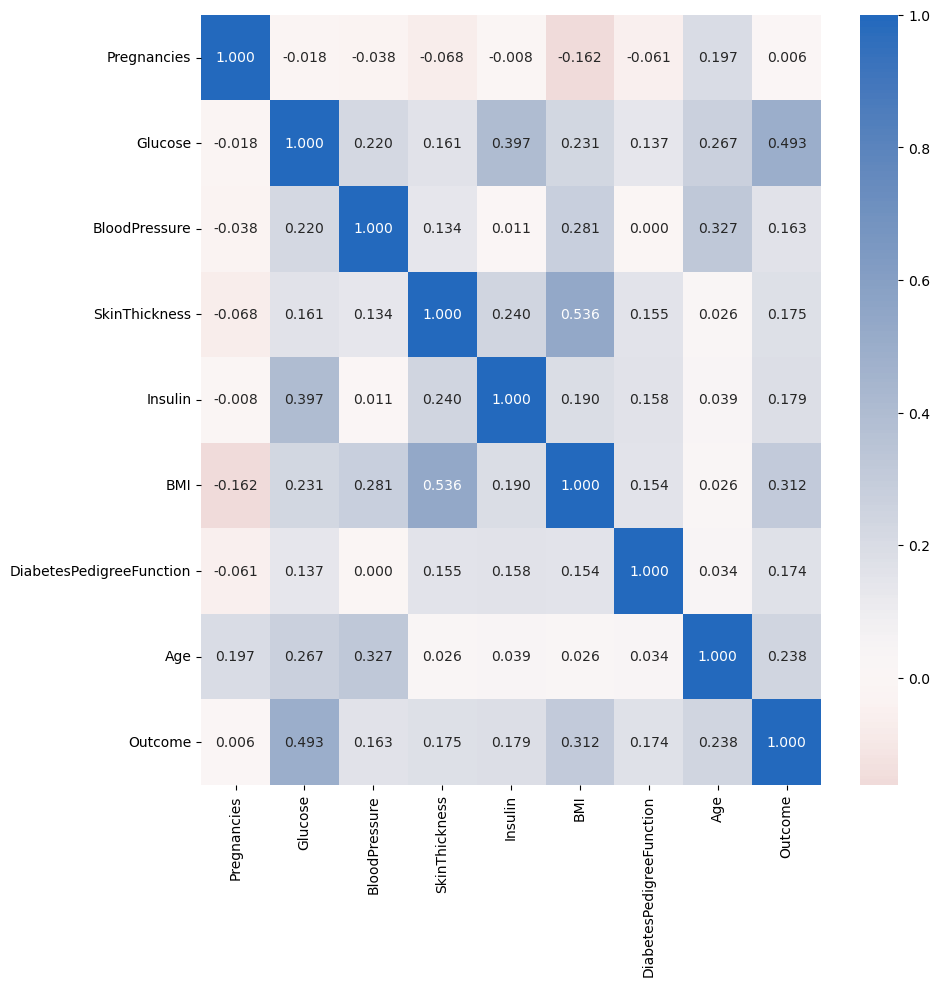

In [323]:
plt.figure(figsize = [10, 10])
sns.heatmap(diabetes_clean.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);
# Returns a heatmap with Pearson correlation values
# Some interesting correlations including age and number of pregencies
# Lets look in a bit more detail using a linear regression in Seaborn

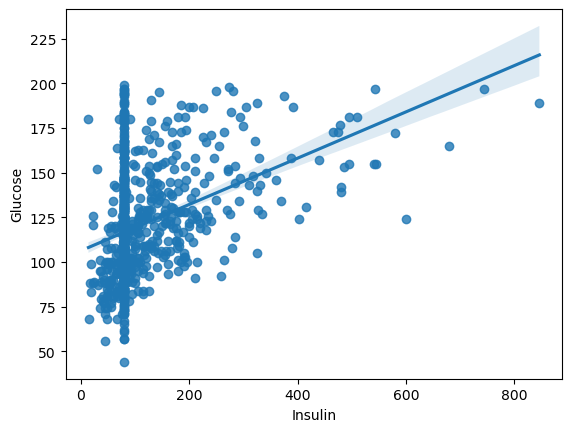

In [324]:
sns.regplot(data=diabetes_clean, x='Insulin', y='Glucose')
plt.xlabel('Insulin')
plt.ylabel('Glucose');
# You can see the result of replacing values for insulin 

## Confidence values and hypothesis testing

In [325]:
# Comparison of values between values and CI of the numerical parameters using a significance level of 5%

# Further info on CI here 
# https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593

### (a) Glucose

In [326]:
diabetes_clean.groupby("Outcome").agg({"Glucose":[np.mean, np.std, np.size]})

Glucose                
               mean        std size
Outcome                            
0        110.705367  24.715021  500
1        142.159661  29.545943  268

In [327]:
# Diabetes patients
glucose_diabetes_mean = 142.159
glucose_diabetes_std = 29.545
glucose_diabetes_n = 268
glucose_diabetes_se = glucose_diabetes_std / np.sqrt(glucose_diabetes_n) # standard error

glucose_diabetes_lcb = glucose_diabetes_mean - 1.96* glucose_diabetes_se  #lower limit of the CI
glucose_diabetes_ucb = glucose_diabetes_mean + 1.96* glucose_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI



# Non-diabetes patients
glucose_nodiabetes_mean = 110.705
glucose_nodiabetes_std = 24.715
glucose_nodiabetes_n = 500
glucose_nodiabetes_se = glucose_nodiabetes_std / np.sqrt(glucose_nodiabetes_n) # standard error

glucose_nodiabetes_lcb = glucose_nodiabetes_mean - 1.96* glucose_nodiabetes_se  #lower limit of the CI
glucose_nodiabetes_ucb = glucose_nodiabetes_mean + 1.96* glucose_nodiabetes_se  #upper limit of the CI

In [328]:
# Diabetes patients
print("Glucose diabetes patients LCB: %.2f" % glucose_diabetes_lcb)
print("Glucose diabetes patients UCB: %.2f" % glucose_diabetes_ucb)

# Non-diabetes patients
print("Glucose non-diabetes patients LCB: %.2f" % glucose_nodiabetes_lcb)
print("Glucose non-diabetes patients UCB: %.2f" % glucose_nodiabetes_ucb)

Glucose diabetes patients LCB: 138.62
Glucose diabetes patients UCB: 145.70
Glucose non-diabetes patients LCB: 108.54
Glucose non-diabetes patients UCB: 112.87


In [329]:
df_glucose = diabetes_clean[['Glucose', 'Outcome']]

In [330]:
df_glucose["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_glucose
# Need to convert 1 and 0 in Outcome column to Diabetes and NotDiabetes respectively for further hypothesis testing

,Glucose,Outcome
0,148.0,Diabetes
1,85.0,NotDiabetes
2,183.0,Diabetes
3,89.0,NotDiabetes
4,137.0,Diabetes
...,...,...
763,101.0,NotDiabetes
764,122.0,NotDiabetes
765,121.0,NotDiabetes
766,126.0,Diabetes


In [331]:
rp.ttest(group1= df_glucose['Glucose'][df_glucose['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_glucose['Glucose'][df_glucose['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy
# further information: https://www.pythonfordatascience.org/independent-samples-t-test-python/

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  268.0  142.159661  29.545943  1.804806  138.606199  145.713122
 1  NotDiabetes  500.0  110.705367  24.715021  1.105289  108.533773  112.876962
 2     combined  768.0  121.681605  30.436016  1.098265  119.525643  123.837567,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    31.4543
 1                   Degrees of freedom =   766.0000
 2                                    t =    15.6791
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1870
 7                            Hedge's g =     1.1858
 8                       Glass's delta1 =     1.0646
 9                     Point-Biserial r =     0.4929)

There is evidence to suggest that the average blood glucsoe concentration for diabetics M=142.15 (95% CI: 138.61, 145.71) was higher than non-diabetics, M=110.71 (95% CI: 108.53, 112.87); t(766)= 15.67, p < 0.000 at the 95% confidence level (using independent t-test)

In [332]:
stats.ttest_ind(df_glucose['Glucose'][df_glucose['Outcome'] == 'Diabetes'],
                df_glucose['Glucose'][df_glucose['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=15.679089773875148, pvalue=2.9374175087328164e-48, df=766.0)

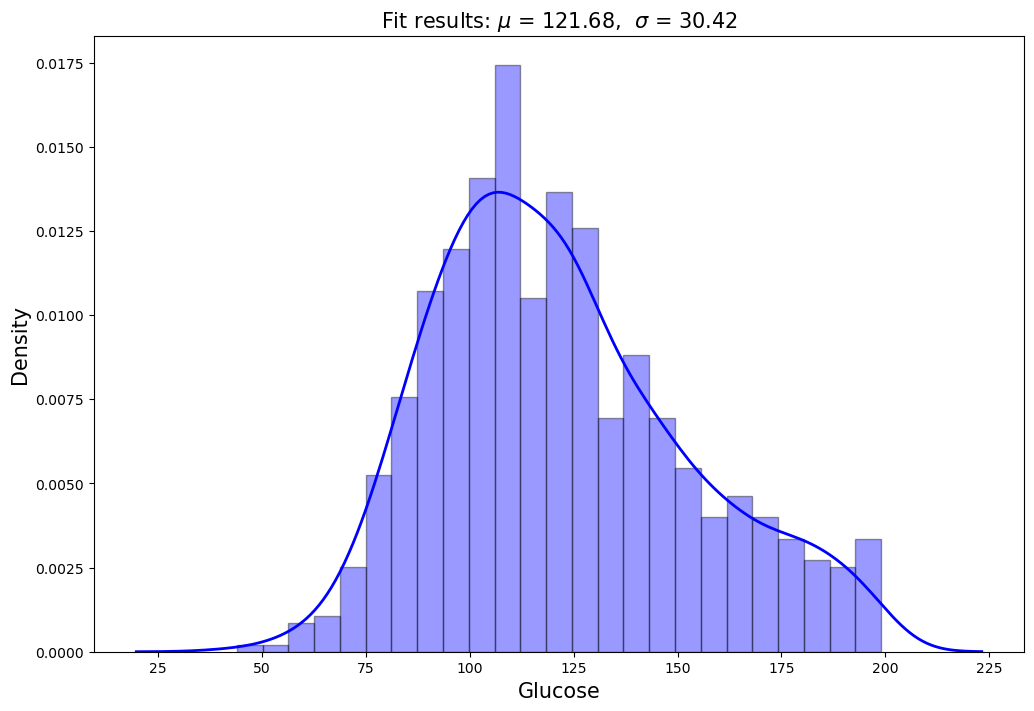

In [333]:
mu, std = norm.fit(df_glucose['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df_glucose['Glucose'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

### (b) Blood Pressure

In [334]:
diabetes_clean.groupby("Outcome").agg({"BloodPressure":[np.mean, np.std, np.size]})

BloodPressure                
                 mean        std size
Outcome                              
0           70.810008  11.932269  500
1           74.950326  12.016572  268

In [335]:
# Diabetes patients
bloodpressure_diabetes_mean = 74.95
bloodpressure_diabetes_std = 12.01
bloodpressure_diabetes_n = 268
bloodpressure_diabetes_se = bloodpressure_diabetes_std / np.sqrt(bloodpressure_diabetes_n) # standard error

bloodpressure_diabetes_lcb = bloodpressure_diabetes_mean - 1.96* bloodpressure_diabetes_se  #lower limit of the CI
bloodpressure_diabetes_ucb = bloodpressure_diabetes_mean + 1.96* bloodpressure_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI

# Non-diabetes patients
bloodpressure_nodiabetes_mean = 70.81
bloodpressure_nodiabetes_std = 11.93
bloodpressure_nodiabetes_n = 500
bloodpressure_nodiabetes_se = bloodpressure_nodiabetes_std / np.sqrt(bloodpressure_nodiabetes_n) # standard error

bloodpressure_nodiabetes_lcb = bloodpressure_nodiabetes_mean - 1.96* bloodpressure_nodiabetes_se  #lower limit of the CI
bloodpressure_nodiabetes_ucb = bloodpressure_nodiabetes_mean + 1.96* bloodpressure_nodiabetes_se  #upper limit of the CI

In [336]:
# Diabetes patients
print("Blood Pressure diabetes patients LCB: %.2f" % bloodpressure_diabetes_lcb)
print("Blood Pressure diabetes patients UCB: %.2f" % bloodpressure_diabetes_ucb)

# Non-diabetes patients
print("Blood Pressure non-diabetes patients LCB: %.2f" % bloodpressure_nodiabetes_lcb)
print("Blood Pressure non-diabetes patients UCB: %.2f" % bloodpressure_nodiabetes_ucb)

Blood Pressure diabetes patients LCB: 73.51
Blood Pressure diabetes patients UCB: 76.39
Blood Pressure non-diabetes patients LCB: 69.76
Blood Pressure non-diabetes patients UCB: 71.86


In [337]:
df_bloodpressure = diabetes_clean[['BloodPressure', 'Outcome']]

In [338]:
df_bloodpressure["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_bloodpressure

,BloodPressure,Outcome
0,72.0,Diabetes
1,66.0,NotDiabetes
2,64.0,Diabetes
3,66.0,NotDiabetes
4,40.0,Diabetes
...,...,...
763,76.0,NotDiabetes
764,70.0,NotDiabetes
765,72.0,NotDiabetes
766,60.0,Diabetes


In [339]:
rp.ttest(group1= df_bloodpressure['BloodPressure'][df_bloodpressure['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_bloodpressure['BloodPressure'][df_bloodpressure['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  74.950326  12.016572  0.734029  73.505105  76.395548
 1  NotDiabetes  500.0  70.810008  11.932269  0.533627  69.761575  71.858441
 2     combined  768.0  72.254807  12.115932  0.437196  71.396564  73.113049,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     4.1403
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.5721
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3461
 7                            Hedge's g =     0.3458
 8                       Glass's delta1 =     0.3446
 9                     Point-Biserial r =     0.1630)

There is evidence to suggest that the average blood pressure for diabetics M=74.95 (95% CI: 73.51, 76.39) was higher than non-diabetics, M=70.81 (95% CI: 69.76, 71.81); t(766)= 4.57, p < 0.000 at the 95% confidence level (using independent t-test)

In [340]:
stats.ttest_ind(df_bloodpressure['BloodPressure'][df_bloodpressure['Outcome'] == 'Diabetes'],
                df_bloodpressure['BloodPressure'][df_bloodpressure['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=4.5720594159921255, pvalue=5.629657191349955e-06, df=766.0)

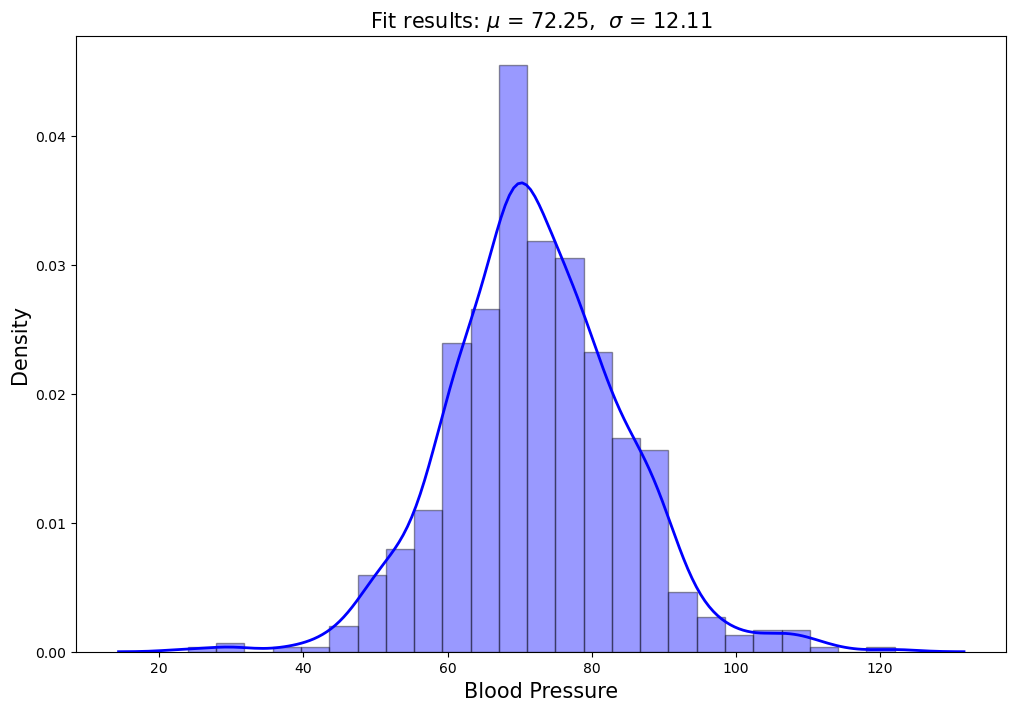

In [341]:
mu, std = norm.fit(df_bloodpressure['BloodPressure'])
plt.figure(figsize = [12, 8])
sns.distplot(df_bloodpressure['BloodPressure'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Blood Pressure", size=15)
plt.ylabel("Density", size=15);

### (c) Skin Thickness

In [342]:
diabetes_clean.groupby("Outcome").agg({"SkinThickness":[np.mean, np.std, np.size]})

SkinThickness                
                 mean        std size
Outcome                              
0           25.373135   9.030644  500
1           28.907494  10.290405  268

In [343]:
# Diabetes patients
skinthickness_diabetes_mean = 28.907
skinthickness_diabetes_std = 10.290
skinthickness_diabetes_n = 268
skinthickness_diabetes_se = skinthickness_diabetes_std / np.sqrt(skinthickness_diabetes_n) # standard error

skinthickness_diabetes_lcb = skinthickness_diabetes_mean - 1.96* skinthickness_diabetes_se  #lower limit of the CI
skinthickness_diabetes_ucb = skinthickness_diabetes_mean + 1.96* skinthickness_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI

# Non-diabetes patients
skinthickness_nodiabetes_mean = 25.373
skinthickness_nodiabetes_std = 9.030
skinthickness_nodiabetes_n = 500
skinthickness_nodiabetes_se = bloodpressure_nodiabetes_std / np.sqrt(bloodpressure_nodiabetes_n) # standard error

skinthickness_nodiabetes_lcb = skinthickness_nodiabetes_mean - 1.96* skinthickness_nodiabetes_se  #lower limit of the CI
skinthickness_nodiabetes_ucb = skinthickness_nodiabetes_mean + 1.96* skinthickness_nodiabetes_se  #upper limit of the CI

In [344]:
# Diabetes patients
print("Skin Thickness diabetes patients LCB: %.2f" % skinthickness_diabetes_lcb)
print("Skin Thickness diabetes patients UCB: %.2f" % skinthickness_diabetes_ucb)

# Non-diabetes patients
print("Skin Thickness non-diabetes patients LCB: %.2f" % skinthickness_nodiabetes_lcb)
print("Skin Thickness non-diabetes patients UCB: %.2f" % skinthickness_nodiabetes_ucb)

Skin Thickness diabetes patients LCB: 27.68
Skin Thickness diabetes patients UCB: 30.14
Skin Thickness non-diabetes patients LCB: 24.33
Skin Thickness non-diabetes patients UCB: 26.42


In [345]:
df_skinthickness = diabetes_clean[['SkinThickness', 'Outcome']]

In [346]:
df_skinthickness["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_skinthickness

,SkinThickness,Outcome
0,35.000000,Diabetes
1,29.000000,NotDiabetes
2,20.536458,Diabetes
3,23.000000,NotDiabetes
4,35.000000,Diabetes
...,...,...
763,48.000000,NotDiabetes
764,27.000000,NotDiabetes
765,23.000000,NotDiabetes
766,20.536458,Diabetes


In [347]:
rp.ttest(group1= df_skinthickness['SkinThickness'][df_skinthickness['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_skinthickness['SkinThickness'][df_skinthickness['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  28.907494  10.290405  0.628587  27.669877  30.145111
 1  NotDiabetes  500.0  25.373135   9.030644  0.403863  24.579655  26.166616
 2     combined  768.0  26.606479   9.631241  0.347537  25.924242  27.288717,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     3.5344
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.9201
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3725
 7                            Hedge's g =     0.3721
 8                       Glass's delta1 =     0.3435
 9                     Point-Biserial r =     0.1750)

In [348]:
stats.ttest_ind(df_skinthickness['SkinThickness'][df_skinthickness['Outcome'] == 'Diabetes'],
                df_skinthickness['SkinThickness'][df_skinthickness['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=4.920089066364796, pvalue=1.0593515094342926e-06, df=766.0)

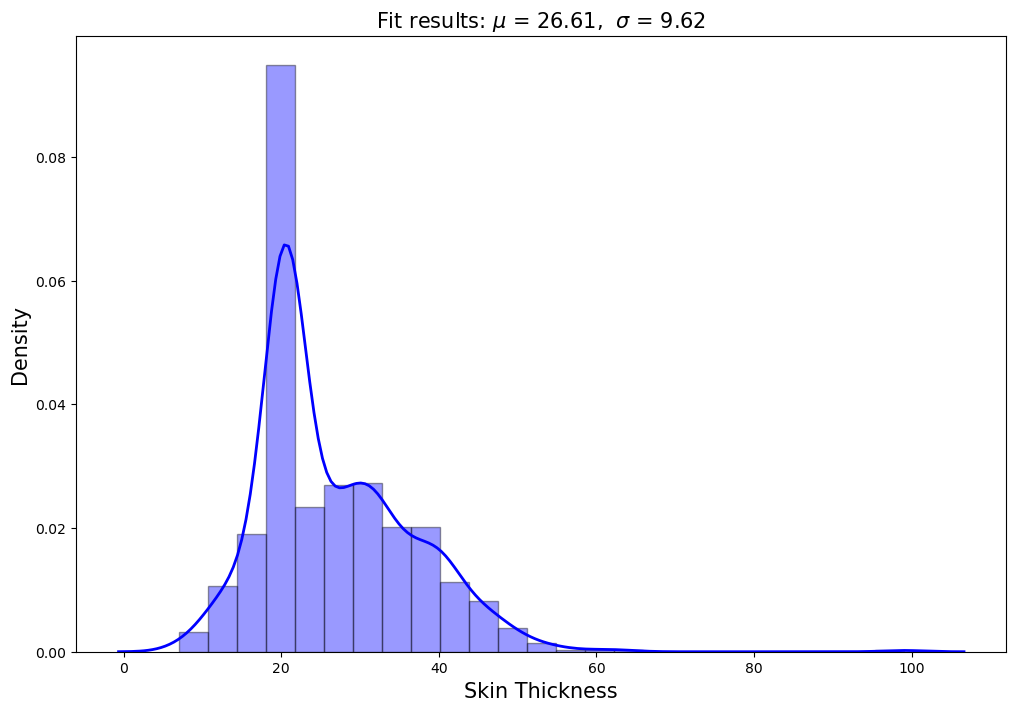

In [349]:
mu, std = norm.fit(df_skinthickness['SkinThickness'])
plt.figure(figsize = [12, 8])
sns.distplot(df_skinthickness['SkinThickness'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Skin Thickness", size=15)
plt.ylabel("Density", size=15);

### (d) Insulin

In [350]:
diabetes_clean.groupby("Outcome").agg({"Insulin":[np.mean, np.std, np.size]})

Insulin                 
               mean         std size
Outcome                             
0        106.457354   78.561997  500
1        141.426597  112.047153  268

In [351]:
# Diabetes patients
insulin_diabetes_mean = 141.426
insulin_diabetes_std = 112.047
insulin_diabetes_n = 268
insulin_diabetes_se = insulin_diabetes_std / np.sqrt(insulin_diabetes_n) # standard error

insulin_diabetes_lcb = insulin_diabetes_mean - 1.96* insulin_diabetes_se  #lower limit of the CI
insulin_diabetes_ucb = insulin_diabetes_mean + 1.96* insulin_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI

# Non-diabetes patients
insulin_nodiabetes_mean = 106.457
insulin_nodiabetes_std = 78.561
insulin_nodiabetes_n = 500
insulin_nodiabetes_se = insulin_nodiabetes_std / np.sqrt(insulin_nodiabetes_n) # standard error

insulin_nodiabetes_lcb = insulin_nodiabetes_mean - 1.96* insulin_nodiabetes_se  #lower limit of the CI
insulin_nodiabetes_ucb = insulin_nodiabetes_mean + 1.96* insulin_nodiabetes_se  #upper limit of the CI

In [352]:
# Diabetes patients
print("Insulin diabetes patients LCB: %.2f" % insulin_diabetes_lcb)
print("Insulin Thickness diabetes patients UCB: %.2f" % insulin_diabetes_ucb)

# Non-diabetes patients
print("Insulin Thickness non-diabetes patients LCB: %.2f" % insulin_nodiabetes_lcb)
print("Insulin Thickness non-diabetes patients UCB: %.2f" % insulin_nodiabetes_ucb)

Insulin diabetes patients LCB: 128.01
Insulin Thickness diabetes patients UCB: 154.84
Insulin Thickness non-diabetes patients LCB: 99.57
Insulin Thickness non-diabetes patients UCB: 113.34


In [353]:
df_insulin = diabetes_clean[['Insulin', 'Outcome']]

In [354]:
df_insulin["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_insulin

,Insulin,Outcome
0,79.799479,Diabetes
1,79.799479,NotDiabetes
2,79.799479,Diabetes
3,94.000000,NotDiabetes
4,168.000000,Diabetes
...,...,...
763,180.000000,NotDiabetes
764,79.799479,NotDiabetes
765,112.000000,NotDiabetes
766,79.799479,Diabetes


In [355]:
rp.ttest(group1= df_insulin['Insulin'][df_insulin['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_insulin['Insulin'][df_insulin['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy

(      Variable      N        Mean          SD        SE   95% Conf.  \
 0     Diabetes  268.0  141.426597  112.047153  6.844369  127.950797   
 1  NotDiabetes  500.0  106.457354   78.561997  3.513399   99.554475   
 2     combined  768.0  118.660163   93.080358  3.358748  112.066733   
 
      Interval  
 0  154.902398  
 1  113.360233  
 2  125.253593  ,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    34.9692
 1                   Degrees of freedom =   766.0000
 2                                    t =     5.0408
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3816
 7                            Hedge's g =     0.3812
 8                       Glass's delta1 =     0.3121
 9                     Point-Biserial r =     0.1792)

In [356]:
stats.ttest_ind(df_insulin['Insulin'][df_insulin['Outcome'] == 'Diabetes'],
                df_insulin['Insulin'][df_insulin['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=5.040842054458568, pvalue=5.788429897832818e-07, df=766.0)

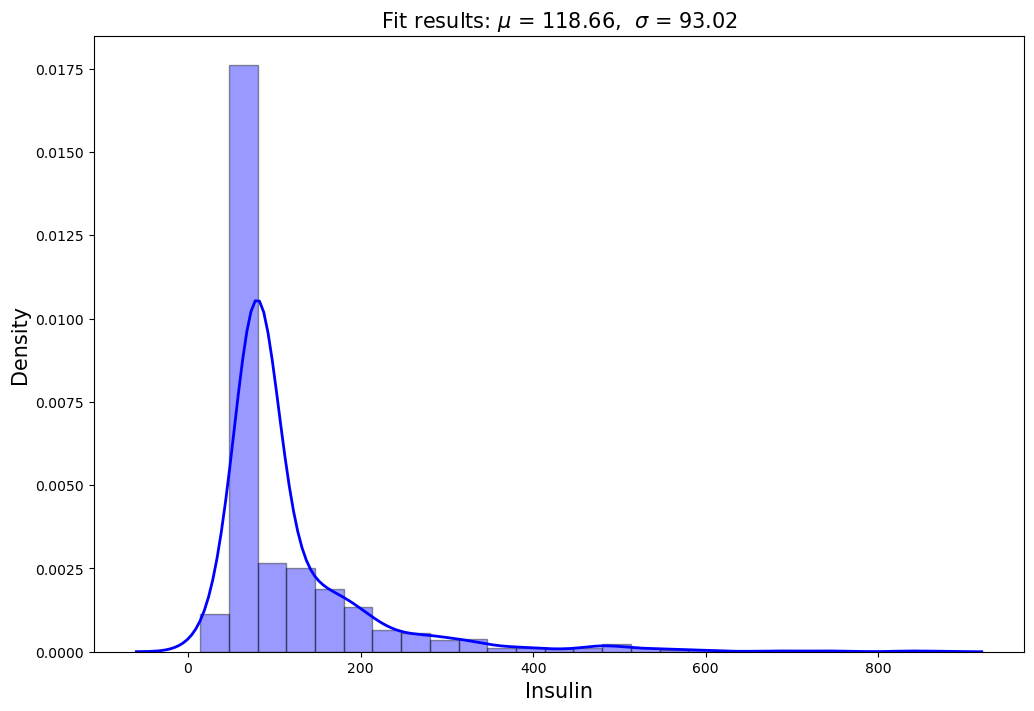

In [357]:
mu, std = norm.fit(df_insulin['Insulin'])
plt.figure(figsize = [12, 8])
sns.distplot(df_insulin['Insulin'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Insulin", size=15)
plt.ylabel("Density", size=15);

### (e) BMI

In [358]:
diabetes_clean.groupby("Outcome").agg({"BMI":[np.mean, np.std, np.size]})

BMI               
              mean       std size
Outcome                          
0        30.880066  6.503051  500
1        35.381288  6.596733  268

In [359]:
# Diabetes patients
bmi_diabetes_mean = 35.381
bmi_diabetes_std = 6.596
bmi_diabetes_n = 268
bmi_diabetes_se = bmi_diabetes_std / np.sqrt(bmi_diabetes_n) # standard error

bmi_diabetes_lcb = bmi_diabetes_mean - 1.96* bmi_diabetes_se  #lower limit of the CI
bmi_diabetes_ucb = bmi_diabetes_mean + 1.96* bmi_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI

# Non-diabetes patients
bmi_nodiabetes_mean = 30.880
bmi_nodiabetes_std = 6.503
bmi_nodiabetes_n = 500
bmi_nodiabetes_se = bmi_nodiabetes_std / np.sqrt(bmi_nodiabetes_n) # standard error

bmi_nodiabetes_lcb = bmi_nodiabetes_mean - 1.96* bmi_nodiabetes_se  #lower limit of the CI
bmi_nodiabetes_ucb = bmi_nodiabetes_mean + 1.96* bmi_nodiabetes_se  #upper limit of the CI

In [360]:
# Diabetes patients
print("BMI diabetes patients LCB: %.2f" % bmi_diabetes_lcb)
print("BMI diabetes patients UCB: %.2f" % bmi_diabetes_ucb)

# Non-diabetes patients
print("BMI non-diabetes patients LCB: %.2f" % bmi_nodiabetes_lcb)
print("BMI Thickness non-diabetes patients UCB: %.2f" % bmi_nodiabetes_ucb)

BMI diabetes patients LCB: 34.59
BMI diabetes patients UCB: 36.17
BMI non-diabetes patients LCB: 30.31
BMI Thickness non-diabetes patients UCB: 31.45


In [361]:
df_bmi = diabetes_clean[['BMI', 'Outcome']]

In [362]:
df_bmi["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_bmi

,BMI,Outcome
0,33.6,Diabetes
1,26.6,NotDiabetes
2,23.3,Diabetes
3,28.1,NotDiabetes
4,43.1,Diabetes
...,...,...
763,32.9,NotDiabetes
764,36.8,NotDiabetes
765,26.2,NotDiabetes
766,30.1,Diabetes


In [363]:
rp.ttest(group1= df_bmi['BMI'][df_bmi['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_bmi['BMI'][df_bmi['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy

(      Variable      N       Mean        SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  35.381288  6.596733  0.402960  34.587905  36.174670
 1  NotDiabetes  500.0  30.880066  6.503051  0.290825  30.308673  31.451459
 2     combined  768.0  32.450805  6.875374  0.248094  31.963782  32.937828,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     4.5012
 1                   Degrees of freedom =   766.0000
 2                                    t =     9.0970
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.6887
 7                            Hedge's g =     0.6880
 8                       Glass's delta1 =     0.6823
 9                     Point-Biserial r =     0.3123)

In [364]:
stats.ttest_ind(df_bmi['BMI'][df_bmi['Outcome'] == 'Diabetes'],
                df_bmi['BMI'][df_bmi['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=9.09702964503362, pvalue=7.868367931282461e-19, df=766.0)

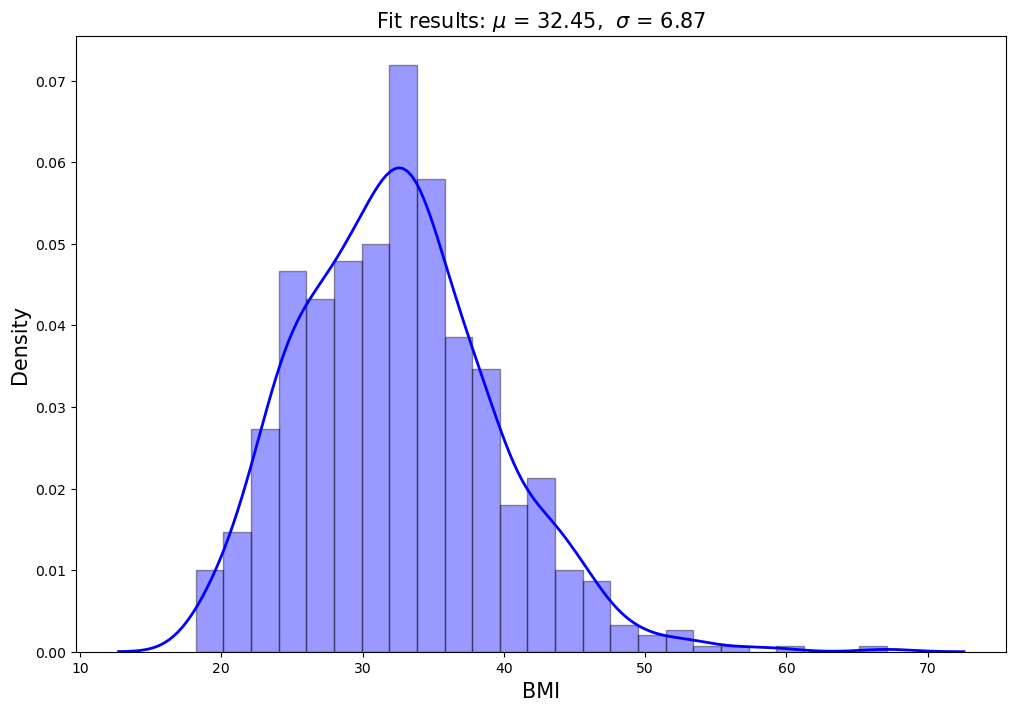

In [365]:
mu, std = norm.fit(df_bmi['BMI'])
plt.figure(figsize = [12, 8])
sns.distplot(df_bmi['BMI'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("BMI", size=15)
plt.ylabel("Density", size=15);

### (f) Diabetes Pedigree Function

In [366]:
diabetes_clean.groupby("Outcome").agg({"DiabetesPedigreeFunction":[np.mean, np.std, np.size]})

DiabetesPedigreeFunction               
                            mean       std size
Outcome                                        
0                       0.429734  0.299085  500
1                       0.550500  0.372354  268

In [367]:
# Diabetes patients
dpf_diabetes_mean = 0.5505
dpf_diabetes_std = 0.3723
dpf_diabetes_n = 268
dpf_diabetes_se = dpf_diabetes_std / np.sqrt(dpf_diabetes_n) # standard error

dpf_diabetes_lcb = dpf_diabetes_mean - 1.96* dpf_diabetes_se  #lower limit of the CI
dpf_diabetes_ucb = dpf_diabetes_mean + 1.96* dpf_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI

# Non-diabetes patients
dpf_nodiabetes_mean = 0.4297
dpf_nodiabetes_std = 0.29908
dpf_nodiabetes_n = 500
dpf_nodiabetes_se = dpf_nodiabetes_std / np.sqrt(dpf_nodiabetes_n) # standard error

dpf_nodiabetes_lcb = dpf_nodiabetes_mean - 1.96* dpf_nodiabetes_se  #lower limit of the CI
dpf_nodiabetes_ucb = dpf_nodiabetes_mean + 1.96* dpf_nodiabetes_se  #upper limit of the CI

In [368]:
# Diabetes patients
print("Diabetes Pedigree Function diabetes patients LCB: %.3f" % dpf_diabetes_lcb)
print("Diabetes Pedigree Function diabetes patients UCB: %.3f" % dpf_diabetes_ucb)

# Non-diabetes patients
print("Diabetes Pedigree Function non-diabetes patients LCB: %.3f" % dpf_nodiabetes_lcb)
print("Diabetes Pedigree Function patients UCB: %.3f" % dpf_nodiabetes_ucb)

Diabetes Pedigree Function diabetes patients LCB: 0.506
Diabetes Pedigree Function diabetes patients UCB: 0.595
Diabetes Pedigree Function non-diabetes patients LCB: 0.403
Diabetes Pedigree Function patients UCB: 0.456


In [369]:
df_dpf = diabetes_clean[['DiabetesPedigreeFunction', 'Outcome']]

In [370]:
df_dpf["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_dpf

,DiabetesPedigreeFunction,Outcome
0,0.627,Diabetes
1,0.351,NotDiabetes
2,0.672,Diabetes
3,0.167,NotDiabetes
4,2.288,Diabetes
...,...,...
763,0.171,NotDiabetes
764,0.340,NotDiabetes
765,0.245,NotDiabetes
766,0.349,Diabetes


In [371]:
rp.ttest(group1= df_dpf['DiabetesPedigreeFunction'][df_dpf['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_dpf['DiabetesPedigreeFunction'][df_dpf['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy

(      Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Diabetes  268.0  0.550500  0.372354  0.022745   0.505717  0.595283
 1  NotDiabetes  500.0  0.429734  0.299085  0.013376   0.403455  0.456013
 2     combined  768.0  0.471876  0.331329  0.011956   0.448406  0.495346,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     0.1208
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.8858
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3699
 7                            Hedge's g =     0.3695
 8                       Glass's delta1 =     0.3243
 9                     Point-Biserial r =     0.1738)

In [372]:
stats.ttest_ind(df_dpf['DiabetesPedigreeFunction'][df_dpf['Outcome'] == 'Diabetes'],
                df_dpf['DiabetesPedigreeFunction'][df_dpf['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=4.88582646072744, pvalue=1.254607010148809e-06, df=766.0)

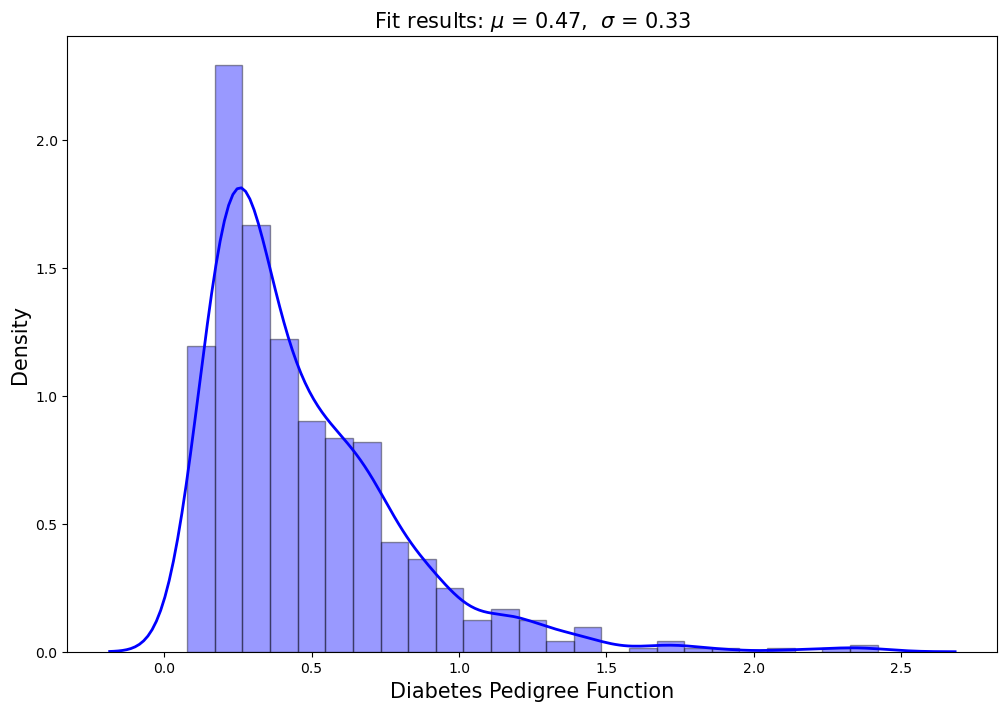

In [373]:
mu, std = norm.fit(df_dpf['DiabetesPedigreeFunction'])
plt.figure(figsize = [12, 8])
sns.distplot(df_dpf['DiabetesPedigreeFunction'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Diabetes Pedigree Function", size=15)
plt.ylabel("Density", size=15);

### (h) Age

In [374]:
diabetes_clean.groupby("Outcome").agg({"Age":[np.mean, np.std, np.size]})

Age                
              mean        std size
Outcome                           
0        31.190000  11.667655  500
1        37.067164  10.968254  268

In [375]:
# Diabetes patients
age_diabetes_mean = 37.067
age_diabetes_std = 10.968
age_diabetes_n = 268
age_diabetes_se = age_diabetes_std / np.sqrt(age_diabetes_n) # standard error

age_diabetes_lcb = age_diabetes_mean - 1.96* age_diabetes_se  #lower limit of the CI
age_diabetes_ucb = age_diabetes_mean + 1.96* age_diabetes_se  #upper limit of the CI
# Z = 1.96 for 95% CI

# Non-diabetes patients
age_nodiabetes_mean = 31.190
age_nodiabetes_std = 1.667
age_nodiabetes_n = 500
age_nodiabetes_se = age_nodiabetes_std / np.sqrt(age_nodiabetes_n) # standard error

age_nodiabetes_lcb = age_nodiabetes_mean - 1.96* age_nodiabetes_se  #lower limit of the CI
age_nodiabetes_ucb = age_nodiabetes_mean + 1.96* age_nodiabetes_se  #upper limit of the CI

In [376]:
# Diabetes patients
print("Age diabetes patients LCB: %.2f" % age_diabetes_lcb)
print("Age diabetes patients UCB: %.2f" % age_diabetes_ucb)

# Non-diabetes patients
print("Age non-diabetes patients LCB: %.2f" % age_nodiabetes_lcb)
print("Age Thickness non-diabetes patients UCB: %.2f" % age_nodiabetes_ucb)

Age diabetes patients LCB: 35.75
Age diabetes patients UCB: 38.38
Age non-diabetes patients LCB: 31.04
Age Thickness non-diabetes patients UCB: 31.34


In [377]:
df_age = diabetes_clean[['Age', 'Outcome']]

In [378]:
df_age["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_age

,Age,Outcome
0,50,Diabetes
1,31,NotDiabetes
2,32,Diabetes
3,21,NotDiabetes
4,33,Diabetes
...,...,...
763,63,NotDiabetes
764,27,NotDiabetes
765,30,NotDiabetes
766,47,Diabetes


In [379]:
rp.ttest(group1= df_age['Age'][df_age['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_age['Age'][df_age['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")
# independent t-test using researchpy

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  37.067164  10.968254  0.669993  35.748023  38.386305
 1  NotDiabetes  500.0  31.190000  11.667655  0.521793  30.164817  32.215183
 2     combined  768.0  33.240885  11.760232  0.424361  32.407839  34.073932,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     5.8772
 1                   Degrees of freedom =   766.0000
 2                                    t =     6.7927
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.5142
 7                            Hedge's g =     0.5137
 8                       Glass's delta1 =     0.5358
 9                     Point-Biserial r =     0.2384)

In [380]:
stats.ttest_ind(df_age['Age'][df_age['Outcome'] == 'Diabetes'],
                df_age['Age'][df_age['Outcome'] == 'NotDiabetes'])
# independent t-test using scipy.stats

TtestResult(statistic=6.792688071649956, pvalue=2.2099754606654358e-11, df=766.0)

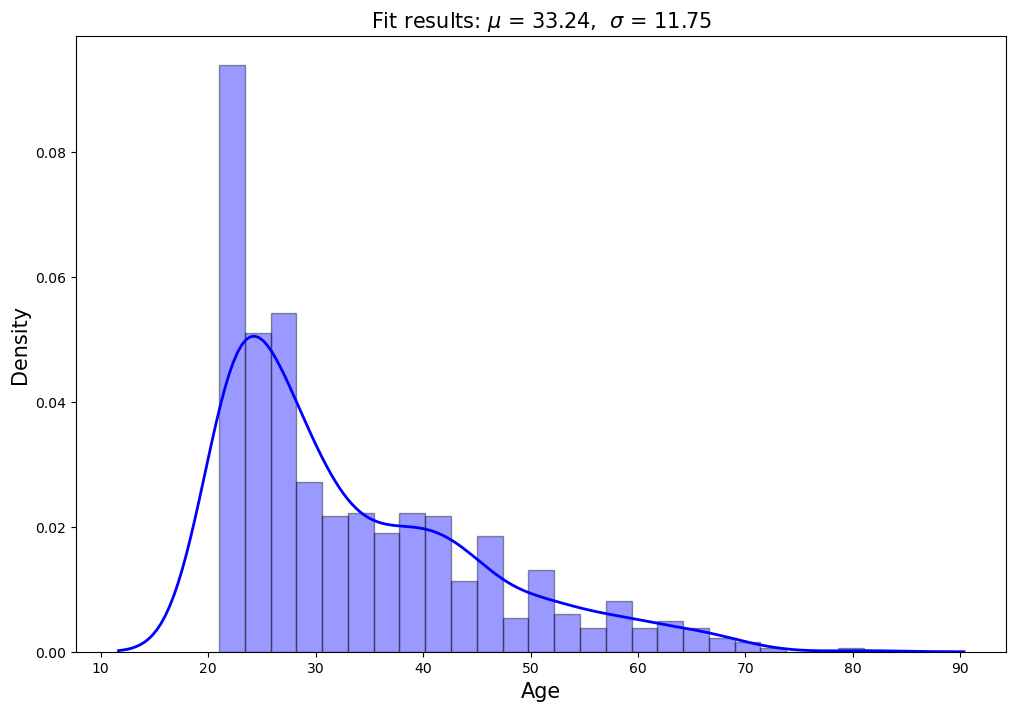

In [381]:
mu, std = norm.fit(df_age['Age'])
plt.figure(figsize = [12, 8])
sns.distplot(df_age['Age'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Age", size=15)
plt.ylabel("Density", size=15);

## Logistic regression

### (a) Initial Logistic regression model

For a comparion to further LR models, this LR model will be completed on the diabetes dataset that contained the missing data and also had pregnancies as a discrete variable.

In [382]:
from sklearn.metrics import confusion_matrix

In [383]:
diabetes['Intercept'] = 1
# Adding intercept

y = diabetes['Outcome']
X = diabetes.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

0.8246753246753247


In [ ]:
cm = confusion_matrix(y_test,y_predict,labels=model.classes_)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap=plt.cm.Blues);
# Confusion matrix

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.874

In [ ]:
print(metrics.classification_report(y_test,y_predict))

In [ ]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

Out of all the different iteriations of LR models in this dataset, this one using the missing data reported as values 0 actually gives the best metrics. Different variables are showed as being significant which contributed to the model the most. However, while these metrics are favourable, they do no realistially represent clinical values, especially considering the variables skin thickness and insulin had a high rate of missing values (circa 45%)

### (b) Logistic Regression using cleaned diabetes dataset

In [ ]:
diabetes_clean['Intercept'] = 1
# Adding intercept

y = diabetes_clean['Outcome']
X = diabetes_clean.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

In [ ]:
cm = confusion_matrix(y_test,y_predict,labels=model.classes_)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap=plt.cm.Blues);
# Confusion matrix

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.834

In [ ]:
print(metrics.classification_report(y_test,y_predict))

In [ ]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

Since DiabetesPedigreeFunction, BMI, Glucose and Age are key variables we will 
do another LR with only these parameters.

### (c) Logistic Regression - Further Iteration

For this iteration of LR mode the signiciant parameters will be used which were identified from previous model.

In [ ]:
diabetes_LR = diabetes_clean.copy()
# Make copy of data set before making minor wrangling operations as we don't want to edit our row data

In [ ]:
diabetes_LR.drop(['Pregnancies', 'BloodPressure','SkinThickness','Insulin'], axis = 1, inplace=True)

# Dropping all columns except DiabetesPedigreeFunction, BMI, Glucose and Age are key variables we will 
# do another LR with only these parameters.


In [ ]:
diabetes_LR

In [ ]:
diabetes_LR.describe()

In [ ]:
# Dont need to add intercept since we have it

y = diabetes_LR['Outcome']
X = diabetes_LR.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

In [ ]:
cm = confusion_matrix(y_test,y_predict,labels=model.classes_)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap=plt.cm.Blues);
# Confusion matrix

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.860

In [ ]:
print(metrics.classification_report(y_test,y_predict))

In [ ]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

### (d) Logistic Regression - Hyperparameter optimization

For this final logistic regression model the four significant variables will be used, but some hyperparameters will be optisimised to try and improve the performance of the model in terms of diabetes prediction.

In [ ]:
diabetes_LR.describe()

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000],
             'max_iter' : [10,100,500]} 

best_model = GridSearchCV(model, parameters)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
model = best_model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

In [ ]:
cm = confusion_matrix(y_test,y_predict,labels=model.classes_)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap=plt.cm.Blues);
# Confusion matrix

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.861

In [ ]:
print(metrics.classification_report(y_test,y_predict))

# This gridsearch resulted in an overfit model 

In [ ]:
patient = [[180, 18, 2.1, 30, 1]] # Glucose, BMI, DiabetesPedigreeFunction, Age, Intercept
best_model.predict(patient)

# Predicting from patient records that a patient has diabetes from clinical observations